## Import Single-Candidate Story CSVs
For the purpose of inter-topic comparison,
and trying to prove that people write about different 
candidates differently it is best to have single-candidate stories

In [1]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast
pandas.options.display.max_colwidth = 100000

In [69]:
all_df = pandas.read_csv('data/all_candidates_nop.csv') 
TOPICS = ['Immigration', 'Campaign Finance', 'Foreign Policy/National Security','Abortion']
all_df = all_df[(all_df['top_topic'].isin(TOPICS))]
deduped_title = all_df.drop_duplicates('title') 

## Filter into Single Candidate Stories

In [225]:
re_all = 'hillary|clinton|bernie|sanders|marco|rubio|donald|trump|ted|cruz|john|kasich'

In [70]:
clinton_only = deduped_title[(~deduped_title['title'].str.contains('bernie|sanders|marco|rubio|donald|trump|ted|cruz|john|kasich', case=False))]
trump_only = deduped_title[(~deduped_title['title'].str.contains('hillary|clinton|bernie|sanders|marco|rubio|ted|cruz|john|kasich', case=False))]
sanders_only = deduped_title[(~deduped_title['title'].str.contains('hillary|clinton|marco|rubio|donald|trump|ted|cruz|john|kasich', case=False))]
cruz_only = deduped_title[(~deduped_title['title'].str.contains('bernie|sanders|hillary|clinton|marco|rubio|donald|trump|john|kasich', case=False))]

In [50]:
print len(trump_only)
print len(clinton_only)
print len(sanders_only)
print len(cruz_only)

472
86
72
124


## Topic Breakdown

In [71]:
print "TOTAL:", len(clinton_only)
clinton_only['top_topic'].value_counts()

TOTAL: 86


Campaign Finance                    35
Foreign Policy/National Security    20
Abortion                            19
Immigration                         12
Name: top_topic, dtype: int64

In [72]:
print "TOTAL:", len(trump_only)
trump_only['top_topic'].value_counts()

TOTAL: 472


Immigration                         199
Foreign Policy/National Security    121
Campaign Finance                     98
Abortion                             54
Name: top_topic, dtype: int64

In [73]:
print "TOTAL:", len(cruz_only)
cruz_only['top_topic'].value_counts()

TOTAL: 124


Campaign Finance                    50
Immigration                         35
Foreign Policy/National Security    21
Abortion                            18
Name: top_topic, dtype: int64

In [74]:
print "TOTAL:", len(sanders_only)
sanders_only['top_topic'].value_counts() 

TOTAL: 72


Campaign Finance                    39
Foreign Policy/National Security    15
Immigration                          9
Abortion                             9
Name: top_topic, dtype: int64

In [24]:
clinton_only.to_csv('data/clinton_top_4.csv', columns=['title', 'org', 'top_topic', 'flesch'])
trump_only.to_csv('data/trump_top_4.csv', columns=['title', 'org', 'top_topic','flesch'])
sanders_only.to_csv('data/sanders_top_4.csv', columns=['title', 'top_topic','org', 'flesch'])
cruz_only.to_csv('data/cruz_top_4.csv', columns=['title', 'org','top_topic', 'flesch'])

## Check Distributions

Immigration


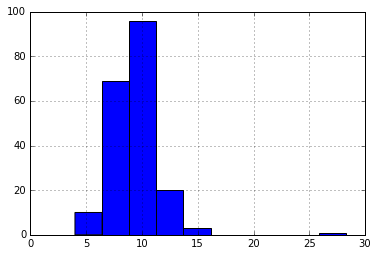

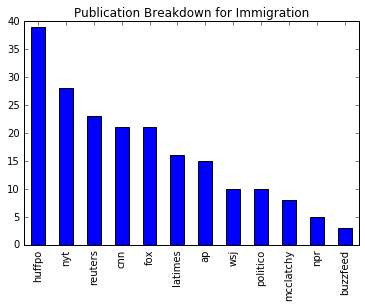

Campaign Finance


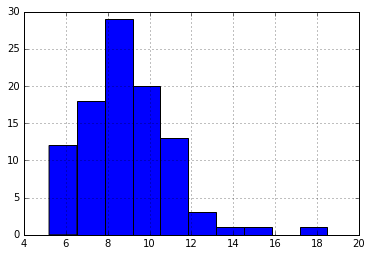

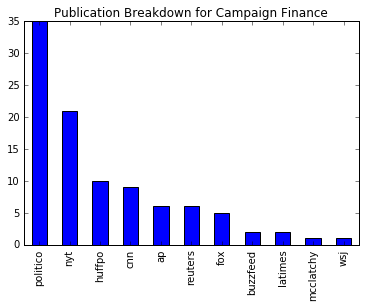

Foreign Policy/National Security


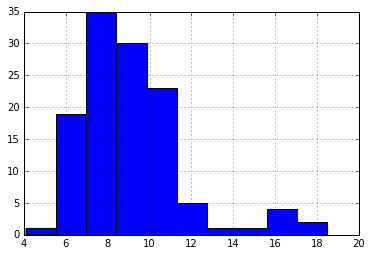

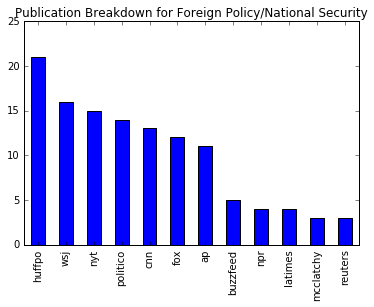

Abortion


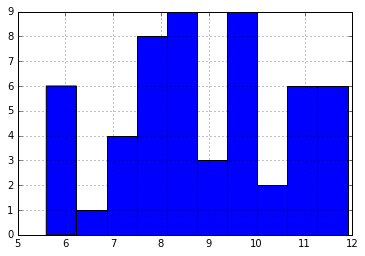

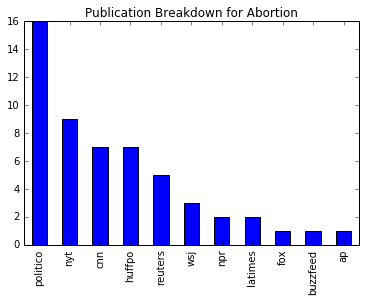

In [90]:
for t in TOPICS:
    print t
    trump_only[trump_only['top_topic'] == t]['flesch'].hist()
    matplotlib.pyplot.show()
    trump_only[trump_only['top_topic'] == t]['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + t)
    matplotlib.pyplot.show()

In [ ]:
for t in TOPICS:
    print t
    clinton_only[clinton_only['top_topic'] == t]['flesch'].hist()
    matplotlib.pyplot.show()
    clinton_only[clinton_only['top_topic'] == t]['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + t)
    matplotlib.pyplot.show()

Immigration


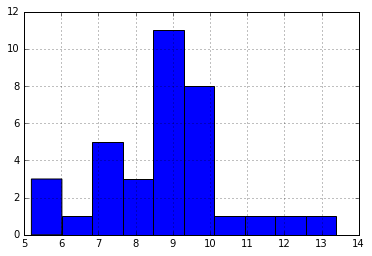

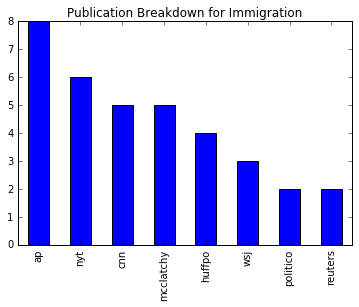

Campaign Finance


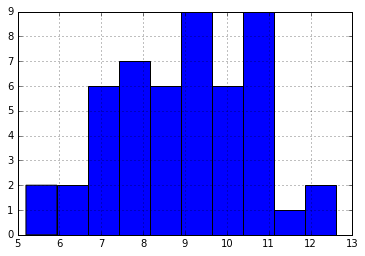

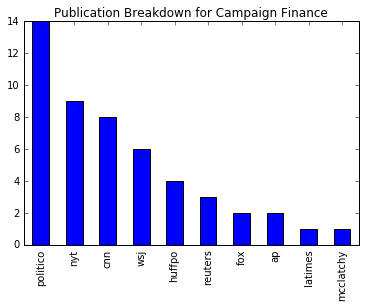

Foreign Policy/National Security


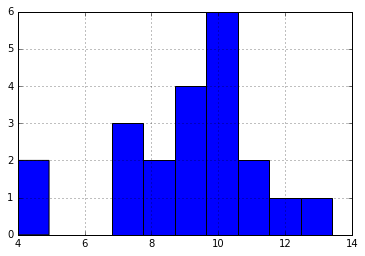

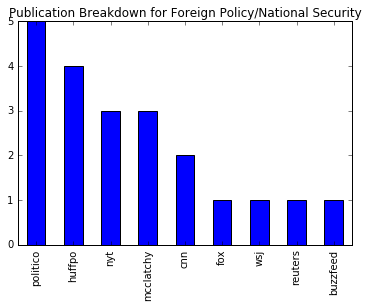

Abortion


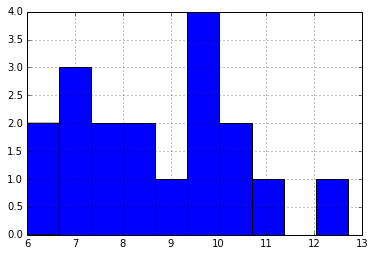

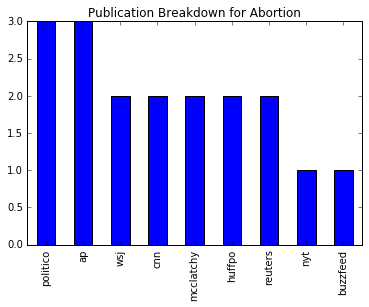

In [93]:
for t in TOPICS:
    print t
    cruz_only[cruz_only['top_topic'] == t]['flesch'].hist()
    matplotlib.pyplot.show()
    cruz_only[cruz_only['top_topic'] == t]['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + t)
    matplotlib.pyplot.show()

Immigration


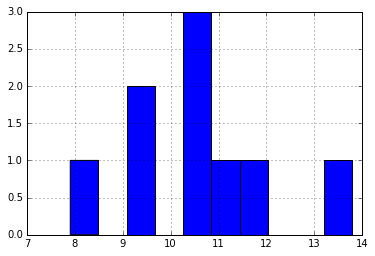

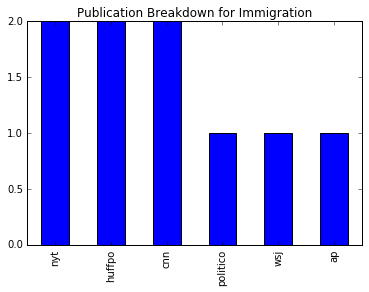

Campaign Finance


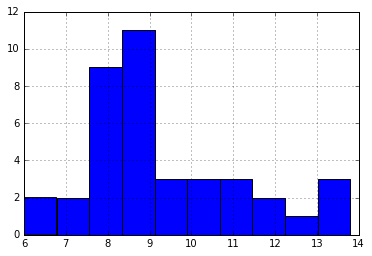

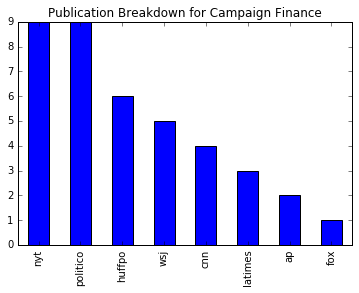

Foreign Policy/National Security


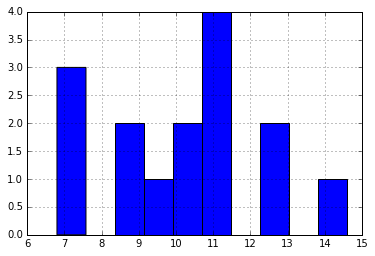

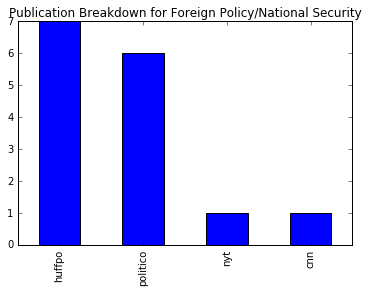

Abortion


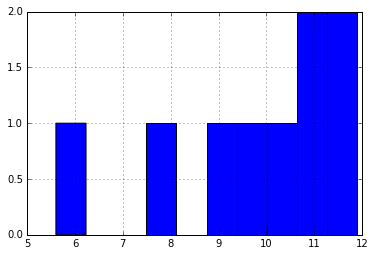

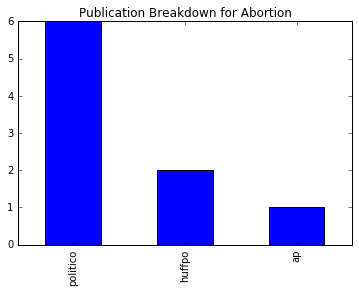

In [91]:
for t in TOPICS:
    print t
    sanders_only[sanders_only['top_topic'] == t]['flesch'].hist()
    matplotlib.pyplot.show()
    sanders_only[sanders_only['top_topic'] == t]['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + t)
    matplotlib.pyplot.show()

## Save each topic to a CSV

In [99]:
topic_to_print = {'Immigration': 'immigration',
                  'Campaign Finance' : 'campaign_finance',
                  'Foreign Policy/National Security': 'foreign_policy',
                  'Abortion':'abortion'}

for t in TOPICS:
    clinton_only[clinton_only['top_topic'] == t].to_csv('data/Top4/clinton_' + topic_to_print[t] + '.csv',
                                                       columns=['title', 'url', 'org', 'top_topic', 'flesch'])
    trump_only[trump_only['top_topic'] == t].to_csv('data/Top4/trump_' + topic_to_print[t] + '.csv',
                                                    columns=['title', 'url', 'org', 'top_topic', 'flesch'])
    sanders_only[sanders_only['top_topic'] == t].to_csv('data/Top4/sanders_' + topic_to_print[t] + '.csv',
                                                        columns=['title', 'url', 'org', 'top_topic', 'flesch'])
    cruz_only[cruz_only['top_topic'] == t].to_csv('data/Top4/cruz_' + topic_to_print[t] + '.csv',
                                                  columns=['title', 'url', 'org', 'top_topic', 'flesch'])

## Sample Size 9 / Topic

In [104]:
topic_to_print = {'Immigration': 'immigration',
                  'Campaign Finance' : 'campaign_finance',
                  'Foreign Policy/National Security': 'foreign_policy',
                  'Abortion':'abortion'}

all_df = pandas.concat([clinton_only, trump_only, cruz_only, sanders_only]) 
#all_df[all_df['top_topic'] == 'Abortion']['candidate'].value_counts()

CANDIDATES = ['clinton', 'trump', 'cruz', 'sanders']

clinton Immigration
flesch


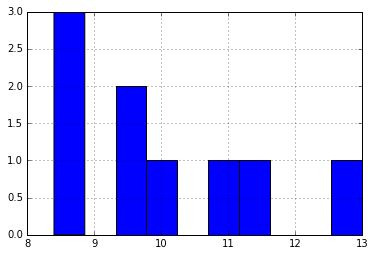

publications


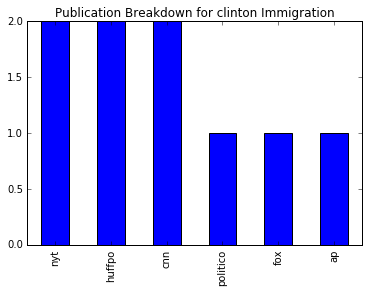

clinton Campaign Finance
flesch


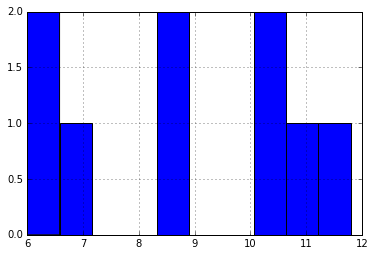

publications


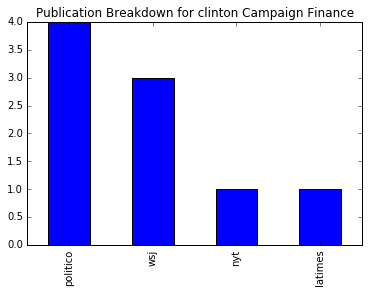

clinton Foreign Policy/National Security
flesch


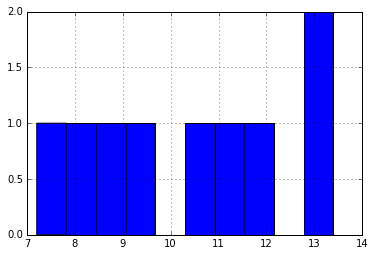

publications


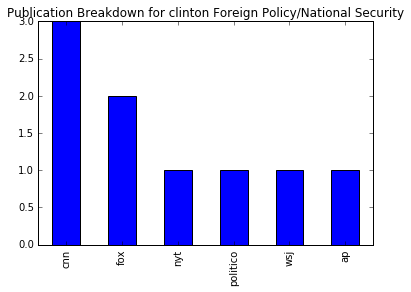

clinton Abortion
flesch


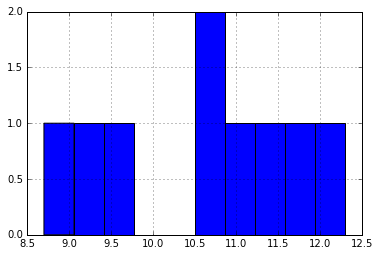

publications


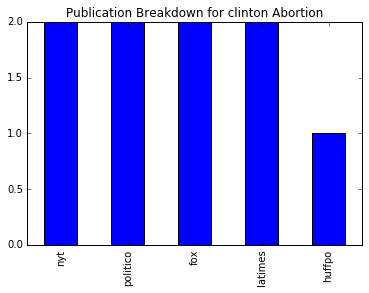

trump Immigration
flesch


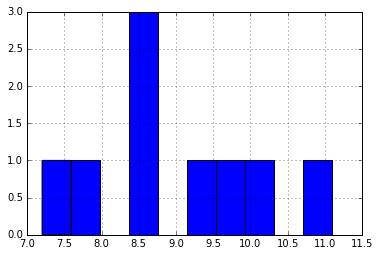

publications


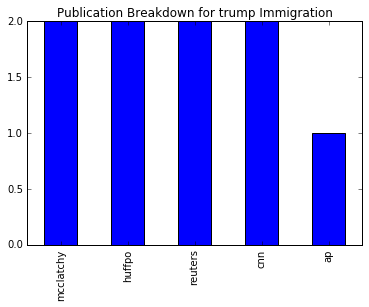

trump Campaign Finance
flesch


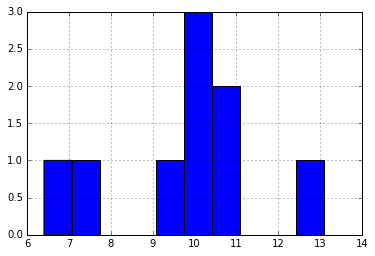

publications


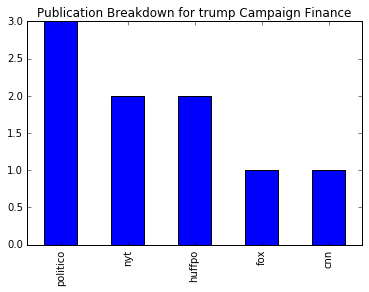

trump Foreign Policy/National Security
flesch


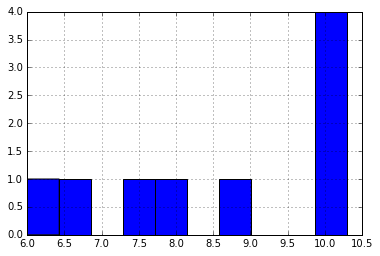

publications


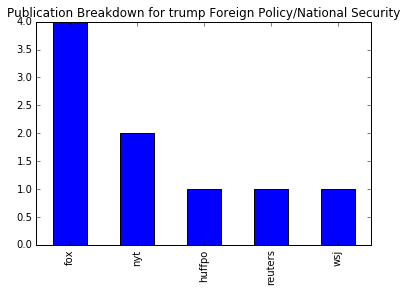

trump Abortion
flesch


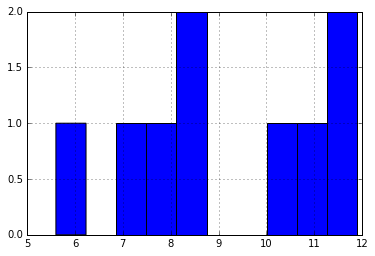

publications


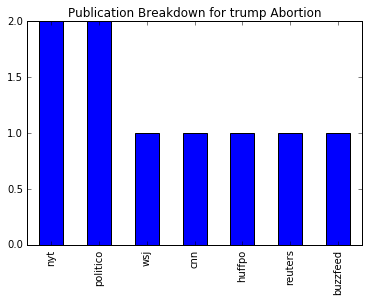

cruz Immigration
flesch


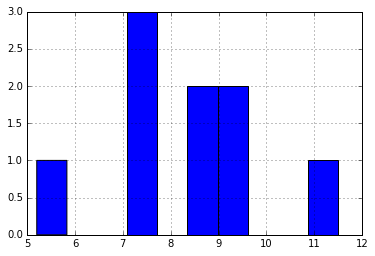

publications


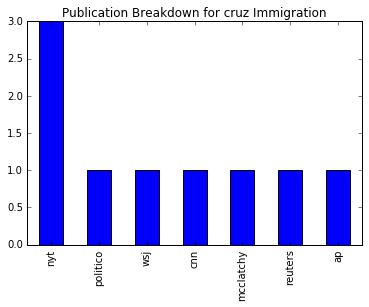

cruz Campaign Finance
flesch


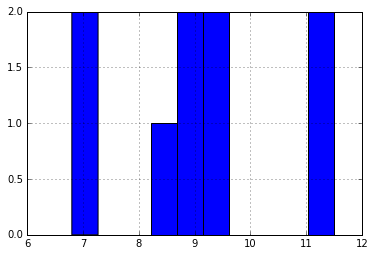

publications


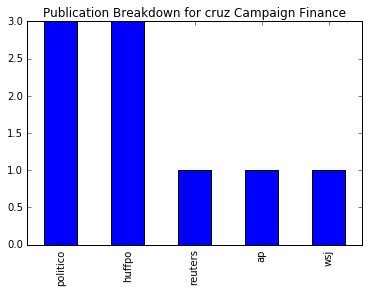

cruz Foreign Policy/National Security
flesch


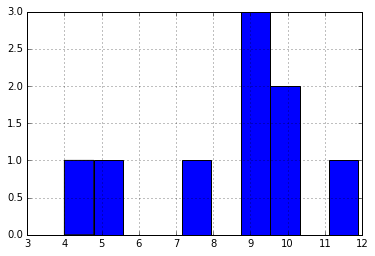

publications


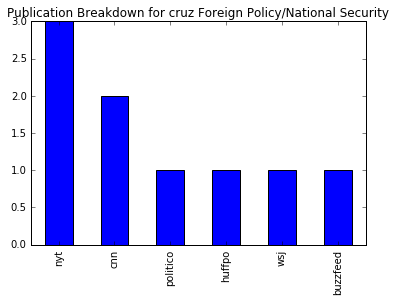

cruz Abortion
flesch


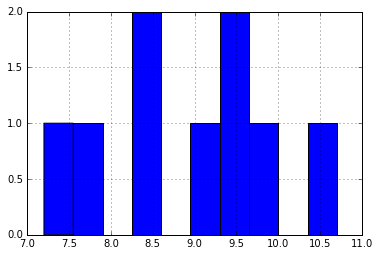

publications


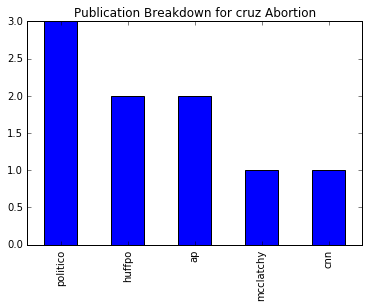

sanders Immigration
flesch


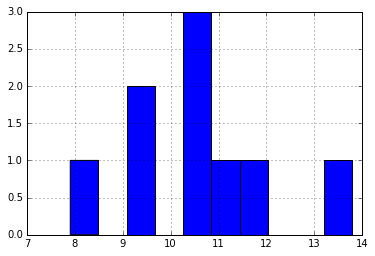

publications


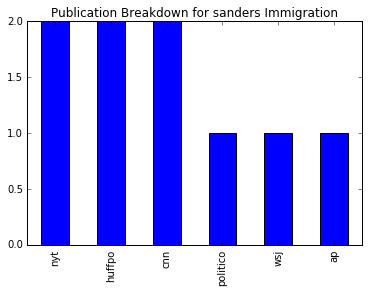

sanders Campaign Finance
flesch


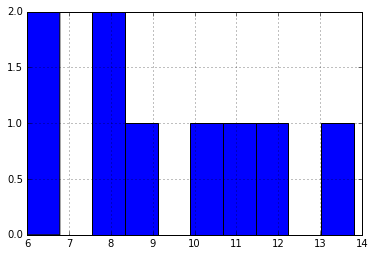

publications


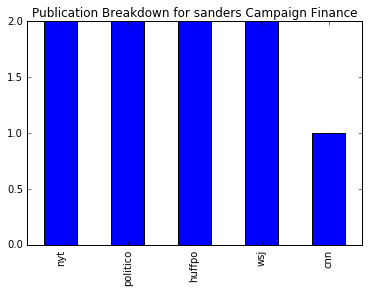

sanders Foreign Policy/National Security
flesch


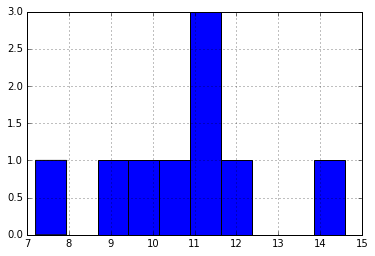

publications


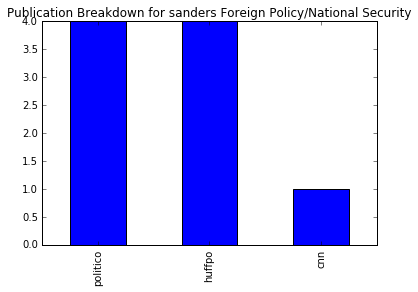

sanders Abortion
flesch


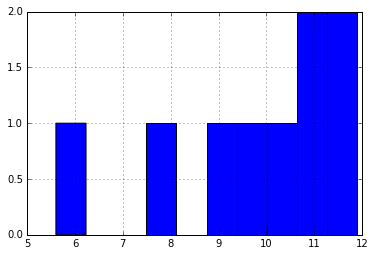

publications


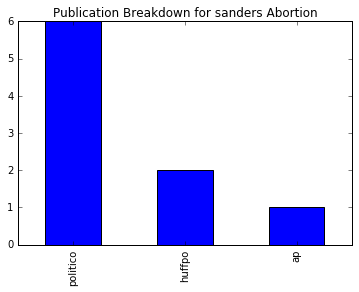

In [123]:
BIGGASS_LIST = []
for c in CANDIDATES: 
    for t in TOPICS:
        print c, t
        sample = all_df[(all_df['top_topic'] == t) & (all_df['candidate'] == c)].sample(9)
        BIGGASS_LIST.append(sample)
        print 'flesch'
        sample['flesch'].hist()
        matplotlib.pyplot.show()
        print 'publications'
        sample['org'].value_counts().plot(kind="bar", title="Publication Breakdown for " + c + " " + t)
        matplotlib.pyplot.show()
        sample.to_csv('data/Top4/sample_9/9_' + c + '_' + topic_to_print[t] + '_all_fields.csv')
                                                  #columns=['title', 'url', 'org', 'top_topic', 'flesch'])
        

In [127]:
all_samples = pandas.concat(BIGGASS_LIST)
all_samples.to_csv('data/Top4/sample_9/for_survey_with_text.csv',
                  columns=['title', 'url', 'org', 'candidate', 'top_topic', 'flesch', 'body'])
all_samples.to_csv('data/Top4/sample_9/for_survey_no_text.csv', 
                  columns=['title', 'url', 'org', 'candidate', 'top_topic', 'flesch'])